<center><h1>Practice Project: Data Exploration</h1></center>

## Importing Necessary Libraries for Data Exploration

## About Dataset
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

### Attributes

* $price =$ price in US dollars (\\$326--\\$18,823)
* $carat =$ weight of the diamond (0.2--5.01)
* $cut =$ quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* $color =$ diamond colour, from J (worst) to D (best)
* $clarity =$ a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* $x =$ length in mm (0--10.74)
* $y =$ width in mm (0--58.9)
* $z =$ depth in mm (0--31.8)
* $depth =$ total depth percentage = $z / mean(x, y) = 2 * z / (x + y) (43--79)$
* $table =$ width of top of diamond relative to widest point (43--95)

## Load the Dataset

In [8]:
diamonds = sns.load_dataset("diamonds")  # Loaded in a Pandas DataFrame
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<Axes: >

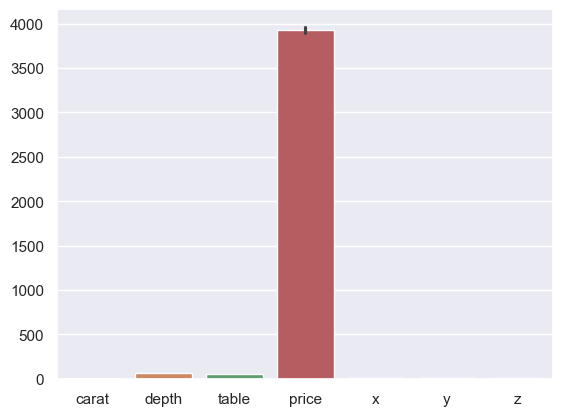

In [11]:
diamonds = sns.load_dataset("diamonds")  # Loaded in a Pandas DataFrame
sns.barplot(data=diamonds)

## 1.0 Variable Identification

In [5]:
diamonds.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [6]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


## 2.0 Univariate Analysis

### 2.1 For continuous variables: mean, median, mode, min, max, histograms (distribution), and boxplots

In [7]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
diamonds.describe(include=['category'])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


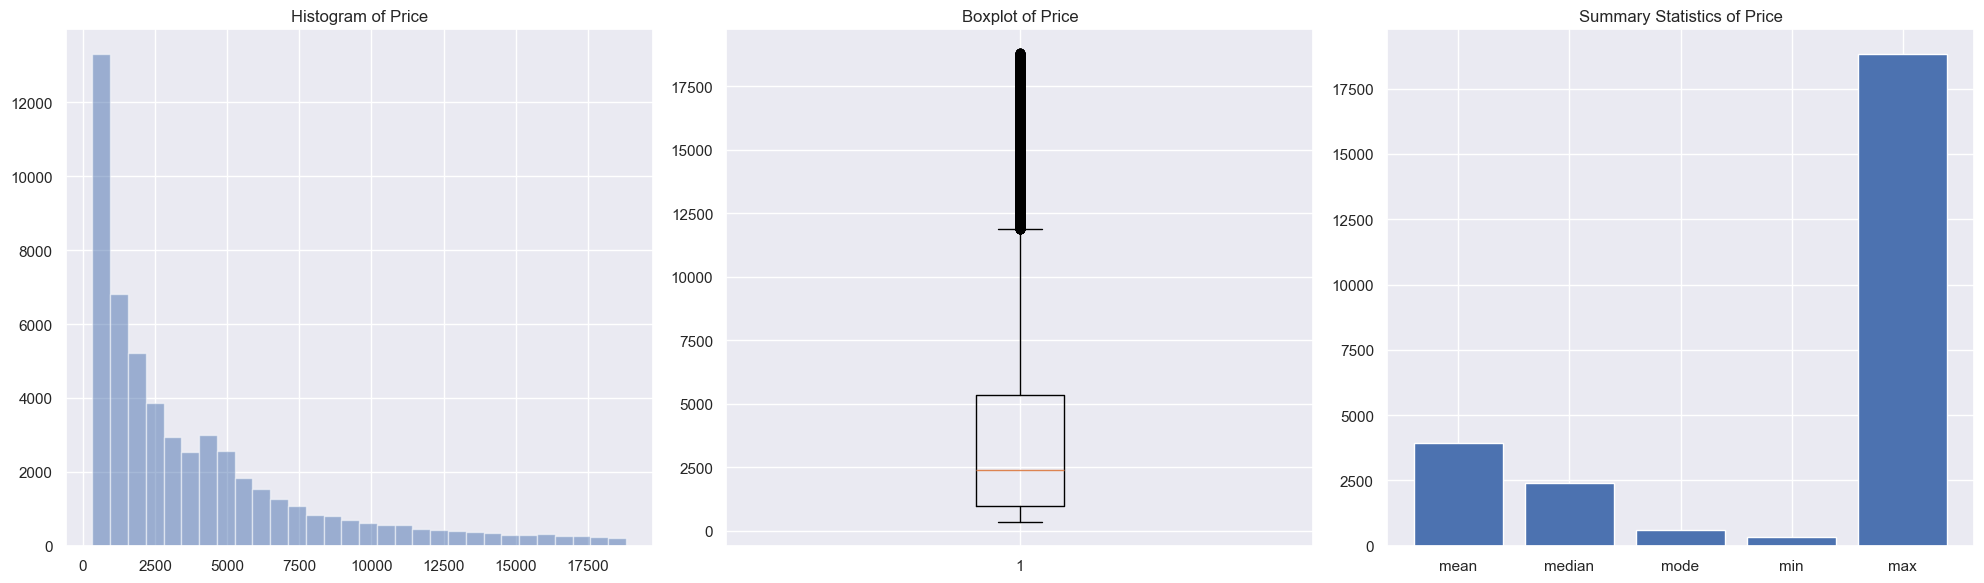

In [16]:
import matplotlib.pyplot as plt

# Calculate the mean, median, mode, min, max
mean = diamonds['price'].mean()
median = diamonds['price'].median()
mode = diamonds['price'].mode()[0]
min_value = diamonds['price'].min()
max_value = diamonds['price'].max()

# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Histogram
axs[0].hist(diamonds['price'], bins=30, alpha=0.5, color='b')
axs[0].set_title('Histogram of Price')

# Boxplot
axs[1].boxplot(diamonds['price'].values)
axs[1].set_title('Boxplot of Price')

# Bar chart
axs[2].bar(['mean', 'median', 'mode', 'min', 'max'], [mean, median, mode, min_value, max_value])
axs[2].set_title('Summary Statistics of Price')

plt.tight_layout()
plt.show()

-Histogram: Provides insights into the frequency distribution of diamond prices, indicating how prices are spread over different ranges.
-Boxplot: Highlights the central tendency, dispersion, and any potential outliers in the diamond prices.
-Bar Chart: Summarizes key statistics (mean, median, mode, min, max) in a simple and comparative format.

### 2.2 For categorical variables: frequency table, count plot

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64


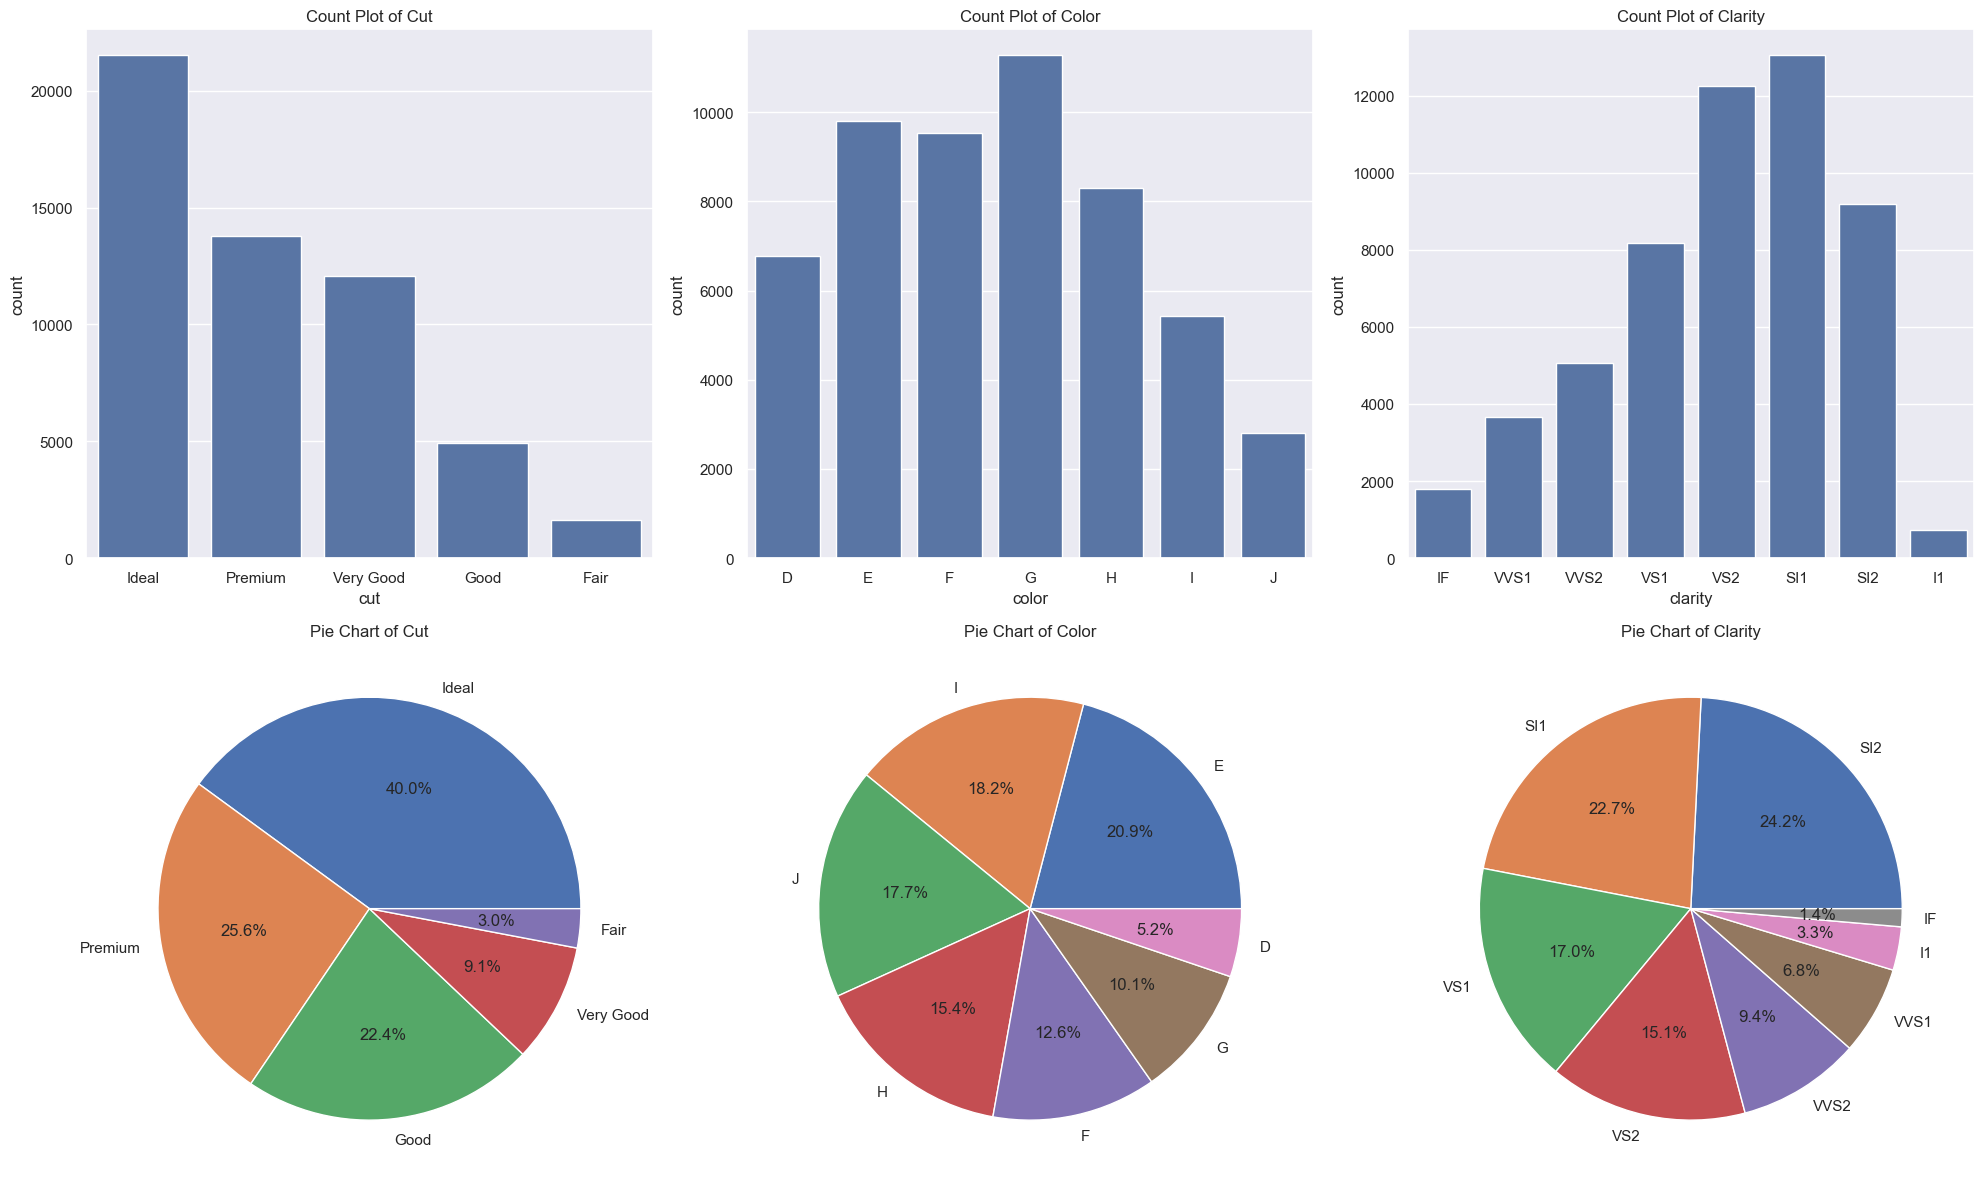

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
fig, axs = plt.subplots(2, 3, figsize=(20, 12))

# Frequency table
print(diamonds['cut'].value_counts())
print(diamonds['color'].value_counts())
print(diamonds['clarity'].value_counts())

# Count plots
sns.countplot(x='cut', data=diamonds, ax=axs[0, 0])
axs[0, 0].set_title('Count Plot of Cut')

sns.countplot(x='color', data=diamonds, ax=axs[0, 1])
axs[0, 1].set_title('Count Plot of Color')

sns.countplot(x='clarity', data=diamonds, ax=axs[0, 2])
axs[0, 2].set_title('Count Plot of Clarity')

# Pie charts
axs[1, 0].pie(diamonds['cut'].value_counts(), labels=diamonds['cut'].unique(), autopct='%1.1f%%')
axs[1, 0].set_title('Pie Chart of Cut')

axs[1, 1].pie(diamonds['color'].value_counts(), labels=diamonds['color'].unique(), autopct='%1.1f%%')
axs[1, 1].set_title('Pie Chart of Color')

axs[1, 2].pie(diamonds['clarity'].value_counts(), labels=diamonds['clarity'].unique(), autopct='%1.1f%%')
axs[1, 2].set_title('Pie Chart of Clarity')

plt.tight_layout()
plt.show()


## 3.0 Bi-variate Analysis

### 3.1 Continuous \& Continuous: scatter plots

### 3.2 Categorical & Categorical: stacked column chart

### 3.3 Categorical & Continuous: boxplots

### 3.4 Correlation Analysis: correlation matrix

## 4.0 Missing Value Analysis

In [14]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## 5.0 Outlier Analysis

## 6.0 Class Imbalance Analysis

**Note:** This is not a classification problem. Here the target variable is $price$. You can just explore the frequency table of some categorical variables.

In [15]:
diamonds["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64